<img src="Figures/logo_trans.png" width="180px" alt="LyonHPC" />
<img width="200px" src="Figures/python-logo.gif" alt="LyonHPC"/>

# Introduction 

<img src="Figures/cloud_intro.png" alt="sommaire" width="300px"/>

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import HTML,display,Markdown
from IPython.display import YouTubeVideo

## Format du cours

- Utilise un document écrit interactif (*IPython notebook*)
avec du texte, des diagrammes, des exemples de code
et des programmes interactifs
   - Vidéo, notes de cours en PDF , notebook en HTML
- A la fin de chaque leçon de cours: quiz et exercices en ligne
- La programmation s'apprend en pratiquant !!
- Cours basé sur des exemples

<img src="Figures/exemples.png" width="400px"/>

**Video du cours: introduction à la simulation scientifique**

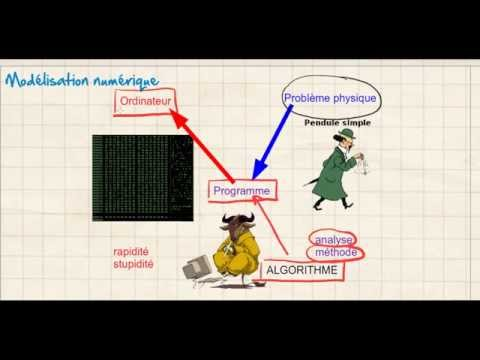

In [4]:
display(Markdown("**Video du cours: introduction à la simulation scientifique**"))
YouTubeVideo('o-RdTDVbF3E')

## Que peut-on faire avec un ordinateur ?

**Équation de base des ordinateurs (Nick Parlante)**
>**Ordinateur = <font color='red'>Puissance</font> + <font color='green'>Stupidité</font>**

- <font color='red'>**puissance**:</font>
un ordinateur peut traiter des masses de données en exécutant des milliards d'opérations par seconde.
- <font color='green'>**stupidité**:</font> mais les opérations sont simples et mécaniques et l'ordinateur ne possède aucune capacité d'analyse.
- <font color='blue'>**l'intelligence**:</font> vient du programme, c'est à dire de l'être humain !

"*The effective exploitation of his powers of abstraction must be regarded as one of the most vital activities of a competent programmer*" (Edsger W. Dijkstra)

Les ordinateurs sont cependant extrêmement utiles. 
Mais toute l'intelligence est dans le logiciel, d'où *l'importance de connaître les principes de la programmation* pour maîtriser l'outil informatique, particulièrement en science.

Les ordinateurs actuels ne sont pas les ordinateurs **HAL 9000** (Heuristically programmed ALgorithmic computer), imaginés par de Stanley Kubrick dans *l'odyssée de l'espace* 


<img src="Figures/odysse1.jpeg" width="250px" alt="odyssée de l'espace"/>

<img src="Figures/odysse2.png" width="200px" alt="odyssée de l'espace"/>


## Utilité d'un ordinateur en Science?

Un ordinateur exécute très rapidement des instructions élémentaires codées en binaire: $\approx 4*6000$ MIPS ou bogoMIPS (millions d'instruction par seconde) sur un ordinateur de bureau (Intel Core I5 4 coeurs). Et il les exécute de façon mécanique.

**Question:**  Comment peut-on utiliser un ordinateur pour simuler un problème physique ?

Par exemple calculer le mouvement d'un pendule simple, puisque l'ordinateur ne connaît ni la mécanique, ni les équations, ni les méthodes de résolutions de ces équations !

### Modélisation numérique

<img src="Figures/programmation1.png" alt="Programmation" width="400px"/>

### Méthode
le scientifique imagine un algorithme pour résoudre le problème de façon mécanique, et le traduit ensuite dans un langage de programmation pour être exécuté par un ordinateur. Il peut ensuite faire l'étude paramétrique du problème comme avec une expérience.

**Problème physique**

<img src="Figures/penduleschema.png" alt="Physique" width="200px"/> 

**Modèle mathématique** 
 
 $$ m l \frac{d^2 \theta}{d t^2} = m g \sin(\theta) $$ 
 $$ Y = [ \theta, \frac{d \theta}{dt} ] $$     
 $$ Y_0=[\theta_0, 0]$$
 
 $$ \frac{d Y}{dt} = F(Y,t) $$     

    
**Algorithme RK2** <br>

    Y = Y0
    Pour i de 1 a n
        Y1 = Y + 0.5 * dt *F(Y,t)
        Y = Y +  dt *F(Y1,t+dt/2)
        t=t+dt
    Fin Pour


### Programmation sous Python

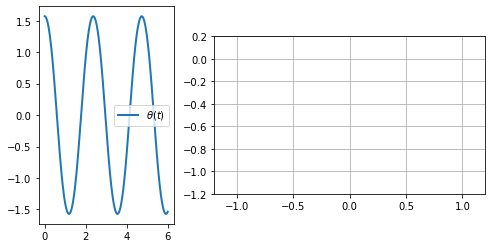

In [5]:
import numpy as np
from anim_pendule import Trace
# parametres
g, l = 9.81, 1.
omega = np.sqrt(g/l)
#  second membre de l'EDO
def F(Y):
    return np.array([Y[1], -omega**2*np.sin(Y[0])])
# condition initiale: angle à t=0
theta0 = 0.5*np.pi
Y = np.array([theta0, 0.])
# n=nbre points par période, etude sur 3 periodes
n = 128
dt = 2 * np.pi / omega / n
N = 3 * n
# calcul solution theta
t = np.zeros(N)
theta = np.zeros(N)
theta[0] = theta0
# boucle d'intégration en temps
for i in range(1, N):
    t[i] = t[i-1] + dt
    Y1 = Y + 0.5 * dt * F(Y)
    Y = Y + dt * F(Y1)
    theta[i] = Y[0]
# trace et animation
anim=Trace(l,theta,t)

In [6]:
HTML(anim.to_html5_video())

## Algorithme

<img src="Figures/Euclid_2.jpg" width="150px" alt="Euclide"/>
<img src="Figures/Euclide.png"  width="200px" alt="Algorithme"/> 
<img src="Figures/al-khawarizmi.jpg" width="80px" alt="al-Khwarizmi"/>

*Un algorithme est une suite finie et non ambigüe d’opérations ou d'instructions permettant de résoudre un problème*. Les algorithmes sont connus depuis l'antiquité (Euclide). 

Le mot **algorithme** vient du nom du mathématicien perse du 9ième siècle (AJC) *Abu Abdullah Muhammad ibn Musa al-Khwarizmi*. L'algorithmique correspond à la phase préparatoire avant une quelconque programmation. Elle permet de décrire un problème sous une forme que l'on peut ensuite programmer sur un ordinateur et ceci dans un langage naturel, indépendant d'un langage de programmation. 

> **algorithme numérique**  suite finie et non ambiguë d’opérations ou d'instructions sur des nombres permettant de résoudre un problème.

Et il n'est pas nécessaire d'avoir un ordinateur pour exécuter un algorithme (machine de Turing inventé en 1936 avant l’ordinateur)!

### <a href="#ici031">Quelques repères historiques</a><a id="ici031"></a>

- Boulier (12e siècle): 1er abaque (dans # civilisations)
- Pascaline (1642): 1ere machine à calculer mécanique
- Arithmométre (1820) (cylindre de Leibnitz 1706)
- Principe d'un ordinateur (Babbage 1834): machine analytique à partir de cartes perforées
- Première définition d'un ordinateur (machine de Turing 1936)
- Premier ordinateur à lampe ENIAC (1943)
- Premier ordinateur à base de transistors IBM 7000 (1960)
- Création d'Internet (Arpanet 1969)
- Premier micro-ordinateur: Micral et Altair 8000 (1973)
- Micro-ordinateurs personnels : Apple (1976), IBM PC (1981)
- Loi de Moore (1965) : doublement de la puissance des ordinateurs tous les 18 mois
- Naissance du système Linux (Linus Torvalds 1991)
- Supercalculateur Curie (2012) $10^{10}$ fois plus puissant qu'un IBM PC de 1981

**Puissance de calcul de Curie**  en 1s $\equiv 10^{15} flops $ (peta flops) $\approx$  calcul pendant 48h de la population du globe équipée de boulier  

<img src="Figures/histoireinfo.png" alt="histoire des ordinateurs" width="500px"/>


## Python langage de programmation scientifique
<img src="Figures/zen-of-python.png" width="150px"/>

**Video du cours: introduction au langage Python**

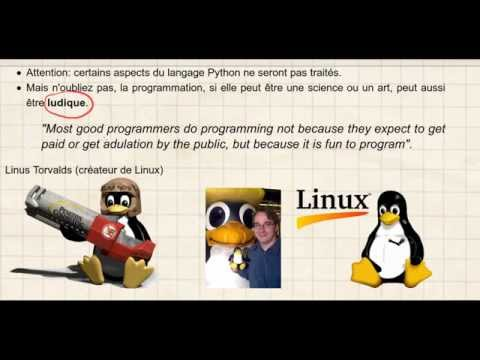

In [7]:
display(Markdown("**Video du cours: introduction au langage Python**"))
YouTubeVideo('OkIroRFkNxQ')


### Historique

Créé en 1989 par Guido van Rossum

- « Benevolent Dictator For Life » (BDFL)
- **Gratuit, libre et multi-plateformes (portable)** 
- Le nom provient de la série britannique 
 - «Monty Python’s Flying Circus» (voir [http://fr.wikipedia.org/wiki/Monty_Python])


<img src="Figures/ungood-guido-van-rossum.jpeg"  width="200px" alt="Guido_van_Rossum"/>
<img src="Figures/python.png" width="200px" alt="Python"/>
<img src="Figures/Monty-python-flying-circus-theredlist.jpg" width="150px" alt="Monty-python"/>


### Propriétés

- Langage **interprété** (facile à utiliser)
- **Usage général**: on peut tout faire
    - interfaces graphiques
    - calcul scientifique
    - applications webs
    - base de données
    - etc. 
- **Vaste librairie de modules** (bibliothèques)
- **Syntaxe cohérente** 
    - Langage orienté objet 
    - Langage fonctionnel 
- **Facile** à apprendre / agréable à utiliser 
- Excellent premier langage de programmation
- **Interfaçage facile** avec les autres langages (C/C++, Fortran, Java) 
- **Défauts ?**
    - selon les circonstances, les programmes écrits en Python peuvent comporter des problèmes de performance 
    - mais c’est le cas de tous les langages interprétés

### Le Zen de Python 

<img src="Figures/zen.png" width="100px" />

Voici 19 règles de programmation Python d'après le BDFL, que l'on trouve sur tout interpréteur python en tapant

In [8]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


### traduction de Cécile Trevian et [Bob Cordeau](http://perso.limsi.fr/pointal/python:courspython3)

1. Préfère la beauté à la laideur,
- Préfère l’explicite à l’implicite,
- Préfère le simple au complexe
- Préfère le complexe au compliqué,
- Préfère le déroulé à l’imbriqué,
- Préfère l’aéré au compact.
- Prends en compte la lisibilité.
- Les cas particuliers ne le sont jamais assez pour violer les règles.
- Mais, à la pureté, privilégie l’aspect pratique.
- Ne passe pas les erreurs sous silence, ou bâillonne-les explicitement.
- Face à l’ambiguïté, à deviner ne te laisse pas aller.
- Sache qu’il ne devrait avoir qu’une et une seule façon de procéder, même si, de prime abord, elle n’est pas évidente, à moins d’être Néerlandais.
- Mieux vaut maintenant que jamais.
- Cependant jamais est souvent mieux qu’immédiatement.
- Si l’implémentation s’explique difficilement, c’est une mauvaise idée.
- Si l’implémentation s’explique aisément, c’est peut-être une bonne idée.
- Les espaces de nommage! Sacrée bonne idée! Faisons plus de trucs comme ça.

## Objectifs du cours

- A la fin de ce cours, vous serez capable d'écrire des programmes à partir d'algorithmes pour résoudre des problèmes scientifiques.
<img src="Figures/exemples.png" style="display:center; width:200px;"/>
- Vous maîtriserez les bases du langage de programmation **Python** pour faire du calcul scientifique.

- Attention: certains aspects du langage Python ne seront pas traités.

- Mais n'oubliez pas, la programmation, si elle peut être une science ou un art, peut aussi être **ludique**. 

>*"Most good programmers do programming not because they expect to get paid or get adulation by the public, but because it is fun to program".*

Linus Torvalds (créateur de Linux)


<img src="Figures/LinuxFun.png" width="200px" alt="Linux"/>
<img src="Figures/linus.jpg" width="100px" alt="Linux"/>
<img src="Figures/steam_linux.png" width="180px" alt="Linux"/>


## Fin de la leçon

<img src="Figures/cloud_intro.png" alt="sommaire" width="400px"/>
